# Data Science Job Posting on Glassdoor

The purpose of this notebook is to focus on data cleaning and to perform EDA to determine what an individual must understand in a job search for a data science role.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
folder = r'C:\Users\Mouth\Documents\Datasets\Practice Datasets\Data Science Job Posting on Glassdoor\Uncleaned_DS_jobs.csv'
df = pd.read_csv(folder)

In [3]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [5]:
# Remove unecessary columns
df_clean = df.drop(columns=['index', 'Competitors'])

In [6]:
# Rename columns for easier referencing 
df_clean.rename(columns= lambda header: header.lower().replace(" ","_"), inplace= True)

In [7]:
df_clean.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD)
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD)
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD)
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [8]:
# Check for duplicate rows
if df_clean.duplicated().any():
    print("Duplicates have been found!")
    # Show duplicate rows
    duplicates = df_clean[df_clean.duplicated(keep=False)]
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No duplicates found")


Duplicates have been found!
Duplicate Rows:
                     job_title               salary_estimate  \
131       Senior Data Engineer   $90K-$109K (Glassdoor est.)   
134  Machine Learning Engineer   $90K-$109K (Glassdoor est.)   
135  Machine Learning Engineer   $90K-$109K (Glassdoor est.)   
136       Senior Data Engineer   $90K-$109K (Glassdoor est.)   
357             Data Scientist  $122K-$146K (Glassdoor est.)   
358             Data Scientist  $122K-$146K (Glassdoor est.)   
359             Data Scientist  $122K-$146K (Glassdoor est.)   
360             Data Scientist  $122K-$146K (Glassdoor est.)   
361             Data Scientist  $122K-$146K (Glassdoor est.)   
362             Data Scientist  $122K-$146K (Glassdoor est.)   
388             Data Scientist  $110K-$163K (Glassdoor est.)   
389             Data Scientist  $110K-$163K (Glassdoor est.)   
495             Data Scientist   $95K-$119K (Glassdoor est.)   
496             Data Scientist   $95K-$119K (Glassdoor est.)

In [9]:
# Check for missing values
missing_value_count = df_clean.isna().sum()
missing_value_count

job_title            0
salary_estimate      0
job_description      0
rating               0
company_name         0
location             0
headquarters         0
size                 0
founded              0
type_of_ownership    0
industry             0
sector               0
revenue              0
dtype: int64

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          672 non-null    object 
 1   salary_estimate    672 non-null    object 
 2   job_description    672 non-null    object 
 3   rating             672 non-null    float64
 4   company_name       672 non-null    object 
 5   location           672 non-null    object 
 6   headquarters       672 non-null    object 
 7   size               672 non-null    object 
 8   founded            672 non-null    int64  
 9   type_of_ownership  672 non-null    object 
 10  industry           672 non-null    object 
 11  sector             672 non-null    object 
 12  revenue            672 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 68.4+ KB


In [11]:
# Inspect job_title
df_clean['job_title'].unique().tolist()

['Sr Data Scientist',
 'Data Scientist',
 'Data Scientist / Machine Learning Expert',
 'Staff Data Scientist - Analytics',
 'Data Scientist - Statistics, Early Career',
 'Data Modeler',
 'Experienced Data Scientist',
 'Data Scientist - Contract',
 'Data Analyst II',
 'Medical Lab Scientist',
 'Data Scientist/Machine Learning',
 'Human Factors Scientist',
 'Business Intelligence Analyst I- Data Insights',
 'Data Scientist - Risk',
 'Data Scientist-Human Resources',
 'Senior Research Statistician- Data Scientist',
 'Data Engineer',
 'Associate Data Scientist',
 'Business Intelligence Analyst',
 'Senior Analyst/Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Data Analyst I',
 'Scientist - Molecular Biology',
 'Computational Scientist, Machine Learning',
 'Senior Data Scientist',
 'Jr. Data Engineer',
 'E-Commerce Data Analyst',
 'Data Analytics Engineer',
 'Product Data Scientist - Ads Data Science',
 'Data Scientist - Intermediate',
 'Global Data Analyst',
 'Data & Mach

In [12]:
# Inspect salary_estimate
df_clean['salary_estimate'].unique()

array(['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)',
       '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)',
       '$90K-$109K (Glassdoor est.)', '$101K-$165K (Glassdoor est.)',
       '$56K-$97K (Glassdoor est.)', '$79K-$106K (Glassdoor est.)',
       '$71K-$123K (Glassdoor est.)', '$90K-$124K (Glassdoor est.)',
       '$91K-$150K (Glassdoor est.)', '$141K-$225K (Glassdoor est.)',
       '$145K-$225K(Employer est.)', '$79K-$147K (Glassdoor est.)',
       '$122K-$146K (Glassdoor est.)', '$112K-$116K (Glassdoor est.)',
       '$110K-$163K (Glassdoor est.)', '$124K-$198K (Glassdoor est.)',
       '$79K-$133K (Glassdoor est.)', '$69K-$116K (Glassdoor est.)',
       '$31K-$56K (Glassdoor est.)', '$95K-$119K (Glassdoor est.)',
       '$212K-$331K (Glassdoor est.)', '$66K-$112K (Glassdoor est.)',
       '$128K-$201K (Glassdoor est.)', '$138K-$158K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$87K-$141K (Glassdoor est.)',
       '$92K-$155K (Glassdo

In [13]:
# Update salary_est with salary range only
df_clean['salary_estimate'] = df_clean['salary_estimate'].apply(lambda x: '-'.join(re.findall(r'\d+', x)))

In [14]:
# Create a min and max salary column (in thousands) by extracting numbers from salary_est column
df_clean['min_salary'] = df_clean['salary_estimate'].apply(lambda x: re.findall(r'\d+', x)[0])
df_clean['max_salary'] = df_clean['salary_estimate'].apply(lambda x: re.findall(r'\d+', x)[1])

In [15]:
df_clean.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,min_salary,max_salary
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171


In [16]:
# Convert min_salary and max_salary to int types
df_clean['min_salary'] = df_clean['min_salary'].map(int) 
df_clean['max_salary'] = df_clean['max_salary'].map(int) 

In [17]:
# Confirm changes
df_clean.dtypes

job_title             object
salary_estimate       object
job_description       object
rating               float64
company_name          object
location              object
headquarters          object
size                  object
founded                int64
type_of_ownership     object
industry              object
sector                object
revenue               object
min_salary             int64
max_salary             int64
dtype: object

In [18]:
# Create a column for average salary
df_clean['avg_salary'] = (df_clean['min_salary'] + df_clean['max_salary']) / 2

In [19]:
# Convert avg_salary to integer
df_clean['avg_salary'] = df_clean['avg_salary'].map(int) 

In [20]:
df_clean.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,min_salary,max_salary,avg_salary
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154


In [21]:
# Inspect job_description and remove \n 
df_clean['job_description'] = df_clean['job_description'].apply(lambda x: ' '.join(x.split('\n')))

In [22]:
df_clean.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,min_salary,max_salary,avg_salary
0,Sr Data Scientist,137-171,Description The Senior Data Scientist is resp...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future Join th...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154
2,Data Scientist,137-171,Overview Analysis Group is one of the larges...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154
3,Data Scientist,137-171,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154
4,Data Scientist,137-171,Data Scientist Affinity Solutions / Marketing ...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154


In [23]:
# Inspect company_name column
df_clean['company_name'].unique().tolist()

['Healthfirst\n3.1',
 'ManTech\n4.2',
 'Analysis Group\n3.8',
 'INFICON\n3.5',
 'Affinity Solutions\n2.9',
 'HG Insights\n4.2',
 'Novartis\n3.9',
 'iRobot\n3.5',
 'Intuit - Data\n4.4',
 'XSELL Technologies\n3.6',
 'Novetta\n4.5',
 '1904labs\n4.7',
 'PNNL\n3.7',
 'Old World Industries\n3.1',
 'Mathematica Policy Research\n3.4',
 'Guzman & Griffin Technologies (GGTI)\n4.4',
 'Upside Business Travel\n4.1',
 'Buckman\n3.5',
 'Insight Enterprises, Inc.\n4.2',
 'Tower Health\n3.5',
 'Triplebyte\n3.2',
 'PulsePoint\n4.3',
 'Exponent\n3.5',
 'Guardian Life\n3.5',
 'Spectrum Communications and Consulting\n3.4',
 'Oversight Systems\n4.7',
 'LSQ\n4.2',
 'MIT Lincoln Laboratory\n3.8',
 'Kingfisher Systems\n4.5',
 'Formation\n2.8',
 'Cohere Health\n5.0',
 'Acuity Insurance\n4.8',
 'Chef\n3.6',
 'Puget Sound Energy\n3.3',
 'Sandhills Global\n2.7',
 'A Place for Mom\n2.7',
 'Great-Circle Technologies\n2.2',
 'Edmunds.com\n3.4',
 'Cambridge Associates, LLC\n3.1',
 'Liberty Mutual Insurance\n3.4',
 'Ce

In [24]:
# Show company name only 
df_clean['company_name'] = df_clean['company_name'].apply(lambda x: x.split('\n')[0])

In [25]:
df_clean.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,min_salary,max_salary,avg_salary
0,Sr Data Scientist,137-171,Description The Senior Data Scientist is resp...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future Join th...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154
2,Data Scientist,137-171,Overview Analysis Group is one of the larges...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154
3,Data Scientist,137-171,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154
4,Data Scientist,137-171,Data Scientist Affinity Solutions / Marketing ...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154


In [26]:
# Inspect location
df_clean['location'].unique().tolist()

['New York, NY',
 'Chantilly, VA',
 'Boston, MA',
 'Newton, MA',
 'Santa Barbara, CA',
 'Cambridge, MA',
 'Bedford, MA',
 'San Diego, CA',
 'Chicago, IL',
 'Herndon, VA',
 'Saint Louis, MO',
 'Richland, WA',
 'Northbrook, IL',
 'Washington, DC',
 'Remote',
 'Memphis, TN',
 'Plano, TX',
 'West Grove, PA',
 'Phoenix, AZ',
 'Appleton, WI',
 'Atlanta, GA',
 'Orlando, FL',
 'Lexington, MA',
 'McLean, VA',
 'San Francisco, CA',
 'Sheboygan, WI',
 'United States',
 'Bothell, WA',
 'Lincoln, NE',
 'Overland Park, KS',
 'Santa Monica, CA',
 'Portsmouth, NH',
 'Ewing, NJ',
 'South San Francisco, CA',
 'Palo Alto, CA',
 'Bellevue, WA',
 'New Orleans, LA',
 'Akron, OH',
 'Fort Wayne, IN',
 'Woburn, MA',
 'Carson, CA',
 'Coral Gables, FL',
 'Santa Clara, CA',
 'Brisbane, CA',
 'Winter Park, FL',
 'Redwood City, CA',
 'Peoria, IL',
 'Ipswich, MA',
 'Carmel, IN',
 'Emeryville, CA',
 'Gaithersburg, MD',
 'Longmont, CO',
 'Austin, TX',
 'Yakima, WA',
 'Santa Cruz, CA',
 'Springfield, VA',
 'Alexandria,

In [27]:
# Inspect headquarters
df_clean['headquarters'].unique().tolist()

['New York, NY',
 'Herndon, VA',
 'Boston, MA',
 'Bad Ragaz, Switzerland',
 'Santa Barbara, CA',
 'Basel, Switzerland',
 'Bedford, MA',
 'Mountain View, CA',
 'Chicago, IL',
 'Mc Lean, VA',
 'Saint Louis, MO',
 'Richland, WA',
 'Northbrook, IL',
 'Princeton, NJ',
 'Mays Landing, NJ',
 'Washington, DC',
 'Memphis, TN',
 'Tempe, AZ',
 'Reading, PA',
 'San Francisco, CA',
 'Menlo Park, CA',
 'Atlanta, GA',
 'Orlando, FL',
 'Lexington, MA',
 'Falls Church, VA',
 'Sheboygan, WI',
 'Seattle, WA',
 'Bellevue, WA',
 'Lincoln, NE',
 'Chantilly, VA',
 'Santa Monica, CA',
 'Ewing, NJ',
 'South San Francisco, CA',
 'Palo Alto, CA',
 'Singapore, Singapore',
 'Cambridge, MA',
 'OSAKA, Japan',
 'Santa Clara, CA',
 'Vienna, VA',
 'New Orleans, LA',
 'Akron, OH',
 'Zurich, Switzerland',
 'Woburn, MA',
 'Carson, CA',
 'Coral Gables, FL',
 'San Ramon, CA',
 'Brisbane, CA',
 'Winter Park, FL',
 'San Rafael, CA',
 'Deerfield, IL',
 'Ipswich, MA',
 'Carmel, IN',
 'Chevy Chase, MD',
 'Hartford, CT',
 'Emeryv

In [28]:
# Check for -1 value in headquarters column
df_clean[(df_clean['headquarters'] == '-1')]

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,min_salary,max_salary,avg_salary
154,ELISA RESEARCH SCIENTIST (CV-15),90-109,"Covaxx, a subsidiary of the UBI Group, has joi...",-1.0,Covid-19 Search Partners,"Hauppauge, NY",-1,-1,-1,-1,-1,-1,-1,90,109,99
158,Machine Learning Engineer,101-165,Overview Radical Convergence is a fast-paced ...,-1.0,Radical Convergence,"Reston, VA",-1,-1,-1,-1,-1,-1,-1,101,165,133
258,Data Scientist,90-124,Full Time Data Scientist The Drive Media is s...,5.0,"The Drive Media, Inc.","New York, NY",-1,Unknown,-1,Unknown,-1,-1,Unknown / Non-Applicable,90,124,107
351,Data Scientist,122-146,About Our AI/ML Team Our mission is to build ...,-1.0,Point72 Ventures,"Palo Alto, CA",-1,-1,-1,-1,-1,-1,-1,122,146,134
357,Data Scientist,122-146,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,122,146,134
358,Data Scientist,122-146,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,122,146,134
359,Data Scientist,122-146,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,122,146,134
360,Data Scientist,122-146,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,122,146,134
361,Data Scientist,122-146,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,122,146,134
362,Data Scientist,122-146,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,122,146,134


In [29]:
# Drop rows
df_clean = df_clean.drop(df_clean[df_clean['headquarters'] == '-1'].index)

In [30]:
# Confirm removal of -1 values in hq
df_clean[(df_clean['headquarters'] == '-1')]

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,min_salary,max_salary,avg_salary


In [31]:
# Inspect company size
df_clean['size'].unique().tolist()

['1001 to 5000 employees',
 '5001 to 10000 employees',
 '501 to 1000 employees',
 '51 to 200 employees',
 '10000+ employees',
 '201 to 500 employees',
 '1 to 50 employees',
 'Unknown']

In [32]:
# Check rows with a company size of unknown
df_clean[df_clean['size'] == 'Unknown']

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,min_salary,max_salary,avg_salary
189,Principal Data Scientist - Machine Learning,56-97,Are you a highly experienced Data Scientist wi...,3.6,Constant Contact,"Waltham, MA","Waltham, MA",Unknown,1995,Subsidiary or Business Segment,Advertising & Marketing,Business Services,Unknown / Non-Applicable,56,97,76
193,Data Scientist,56-97,Job Description Client JD below: We need a te...,5.0,SkillSoniq,"San Francisco, CA","Jersey City, NJ",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,56,97,76
261,Principal Data Scientist - Machine Learning,90-124,Are you a highly experienced Data Scientist wi...,3.6,Constant Contact,"Waltham, MA","Waltham, MA",Unknown,1995,Subsidiary or Business Segment,Advertising & Marketing,Business Services,Unknown / Non-Applicable,90,124,107
274,Data Scientist,91-150,Job Description Client JD below: We need a te...,5.0,SkillSoniq,"San Francisco, CA","Jersey City, NJ",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,91,150,120
282,Data Scientist,91-150,Greetings from Trovetechs!!! Â We have an im...,-1.0,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,91,150,120
285,Data Scientist,141-225,Greetings from Trovetechs!!! Â We have an im...,-1.0,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,141,225,183
308,Data Scientist,145-225,Data Scientist Requirements MS or PhD in Comp...,5.0,Kollasoft Inc.,"New York, NY","Irving, TX",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,145,225,185
409,Data Scientist,124-198,About Navio: Navio builds software tools that ...,-1.0,Navio,"San Mateo, CA","Half Moon Bay, CA",Unknown,-1,Unknown,-1,-1,Unknown / Non-Applicable,124,198,161
430,Data Scientist,79-133,Job Description Falcon It is seeking a Data Sc...,-1.0,Falcon IT & Staffing Solutions,"Fort Belvoir, VA","Washington, DC",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,79,133,106
444,Data Scientist,79-133,About Hive Hive is a full-stack deep learning...,2.1,Hive (CA),"San Francisco, CA","Los Angeles, CA",Unknown,2019,Company - Private,Telecommunications Services,Telecommunications,Unknown / Non-Applicable,79,133,106


In [33]:
# Inspect founded
df_clean['founded'].unique().tolist()

[1993,
 1968,
 1981,
 2000,
 1998,
 2010,
 1996,
 1990,
 1983,
 2014,
 2012,
 2016,
 1965,
 1973,
 1986,
 1997,
 2015,
 1945,
 1988,
 2017,
 2011,
 1967,
 1860,
 1992,
 2003,
 1951,
 2005,
 2019,
 1925,
 2008,
 1999,
 1978,
 1966,
 1912,
 1958,
 2013,
 1849,
 1781,
 1926,
 2006,
 1994,
 1863,
 1995,
 -1,
 1982,
 1974,
 2001,
 1985,
 1913,
 1971,
 1911,
 2009,
 1959,
 2007,
 1939,
 2002,
 1961,
 1963,
 1969,
 1946,
 1957,
 1953,
 1948,
 1850,
 1851,
 2004,
 1976,
 1918,
 1954,
 1947,
 1955,
 2018,
 1937,
 1917,
 1935,
 1929,
 1820,
 1952,
 1932,
 1894,
 1960,
 1788,
 1830,
 1984,
 1933,
 1880,
 1887,
 1970,
 1942,
 1980,
 1989,
 1908,
 1853,
 1875,
 1914,
 1898,
 1956,
 1977,
 1987,
 1896,
 1972,
 1949,
 1962]

In [34]:
# Check -1 value in founded column
df_clean[df_clean['founded'] == -1]

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,min_salary,max_salary,avg_salary
69,Data Scientist - Machine Learning,79-131,"Headquartered in Brisbane, Calif., CareDx, Inc...",2.5,CareDx,"Brisbane, CA","Brisbane, CA",1 to 50 employees,-1,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,79,131,105
112,Data Scientist (TS/SCI),99-132,Are you an intelligence analyst looking to fur...,3.5,Maxar Technologies,"Herndon, VA","Westminster, CO",5001 to 10000 employees,-1,Company - Public,Aerospace & Defense,Aerospace & Defense,$2 to $5 billion (USD),99,132,115
162,Geospatial Data Scientist,101-165,Maxar is seeking a seasoned Geospatial Data Sp...,3.5,Maxar Technologies,"Chantilly, VA","Westminster, CO",5001 to 10000 employees,-1,Company - Public,Aerospace & Defense,Aerospace & Defense,$2 to $5 billion (USD),101,165,133
193,Data Scientist,56-97,Job Description Client JD below: We need a te...,5.0,SkillSoniq,"San Francisco, CA","Jersey City, NJ",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,56,97,76
195,Data Scientist,56-97,"About Joby Located in Northern California, the...",4.3,Joby Aviation,"San Carlos, CA","Santa Cruz, CA",51 to 200 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,56,97,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Data Scientist,105-167,"Role: Data ScientistÂ Location: Washington, D...",4.0,Comtech Global Inc,"Washington, DC","Columbus, OH",51 to 200 employees,-1,Company - Private,"Health, Beauty, & Fitness",Consumer Services,$5 to $10 million (USD),105,167,136
661,Data Scientist,105-167,Our Data Scientist is responsible for in-depth...,3.6,Qurate Retail Group,"West Chester, PA","West Chester, PA",10000+ employees,-1,Company - Public,Other Retail Stores,Retail,Unknown / Non-Applicable,105,167,136
662,Data Scientist,105-167,Solution IT Inc. is looking for an Data Scient...,4.4,"SolutionIT, Inc.","Edison, NJ","Wilmington, MA",51 to 200 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,105,167,136
664,Data Scientist,105-167,Job Description Clear Ridge has an exciting op...,-1.0,Clear Ridge Defense,"Quantico, VA","Baltimore, MD",1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,105,167,136


In [35]:
# Inspect type of ownership
df_clean['type_of_ownership'].unique().tolist()

['Nonprofit Organization',
 'Company - Public',
 'Private Practice / Firm',
 'Company - Private',
 'Government',
 'Subsidiary or Business Segment',
 'Other Organization',
 'Hospital',
 'Self-employed',
 'College / University',
 'Contract',
 'Unknown']

In [36]:
# Inspect industry
df_clean['industry'].unique().tolist()

['Insurance Carriers',
 'Research & Development',
 'Consulting',
 'Electrical & Electronic Manufacturing',
 'Advertising & Marketing',
 'Computer Hardware & Software',
 'Biotech & Pharmaceuticals',
 'Consumer Electronics & Appliances Stores',
 'Enterprise Software & Network Solutions',
 'IT Services',
 'Energy',
 'Chemical Manufacturing',
 'Federal Agencies',
 'Internet',
 'Health Care Services & Hospitals',
 'Investment Banking & Asset Management',
 'Aerospace & Defense',
 'Utilities',
 '-1',
 'Express Delivery Services',
 'Staffing & Outsourcing',
 'Insurance Agencies & Brokerages',
 'Consumer Products Manufacturing',
 'Industrial Manufacturing',
 'Food & Beverage Manufacturing',
 'Banks & Credit Unions',
 'Video Games',
 'Shipping',
 'Telecommunications Services',
 'Lending',
 'Cable, Internet & Telephone Providers',
 'Real Estate',
 'Venture Capital & Private Equity',
 'Miscellaneous Manufacturing',
 'Oil & Gas Services',
 'Transportation Equipment Manufacturing',
 'Telecommunicati

In [37]:
# Check rows that contain -1 in the industry column
df_clean[(df_clean['industry'] == '-1')]

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,min_salary,max_salary,avg_salary
42,Data Analyst I,75-131,Who is Cenlar? You are. Employee-owners have...,2.6,Cenlar,"Ewing, NJ","Ewing, NJ",1001 to 5000 employees,1958,Company - Private,-1,-1,$100 to $500 million (USD),75,131,103
168,Data Engineer,101-165,Job Number: 10202 Group: Cosma International D...,3.5,Magna International Inc.,"Birmingham, AL","Aurora, Canada",10000+ employees,1957,Company - Public,-1,-1,$10+ billion (USD),101,165,133
193,Data Scientist,56-97,Job Description Client JD below: We need a te...,5.0,SkillSoniq,"San Francisco, CA","Jersey City, NJ",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,56,97,76
195,Data Scientist,56-97,"About Joby Located in Northern California, the...",4.3,Joby Aviation,"San Carlos, CA","Santa Cruz, CA",51 to 200 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,56,97,76
248,Data Scientist,90-124,Descript is a new kind of audio/video creation...,4.3,Descript,"San Francisco, CA","Houston, TX",1 to 50 employees,-1,Company - Private,-1,-1,Less than $1 million (USD),90,124,107
251,Data Scientist,90-124,We are looking for a Data Scientist to analyze...,4.0,Better Hire,"Birmingham, AL","Birmingham, AL",1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,90,124,107
272,Data Scientist,91-150,Business Unit: Data Scientist Comcast brings t...,3.5,Comcast,"New York, NY","Philadelphia, PA",10000+ employees,1963,Company - Public,-1,-1,$10+ billion (USD),91,150,120
274,Data Scientist,91-150,Job Description Client JD below: We need a te...,5.0,SkillSoniq,"San Francisco, CA","Jersey City, NJ",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,91,150,120
282,Data Scientist,91-150,Greetings from Trovetechs!!! Â We have an im...,-1.0,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,91,150,120
285,Data Scientist,141-225,Greetings from Trovetechs!!! Â We have an im...,-1.0,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,141,225,183


In [38]:
# Replace -1 with Unknown
indexes = df_clean[(df_clean['industry'] == '-1')].index
for index in indexes:
    df_clean.loc[index, 'industry'] = 'Unknown'

In [39]:
# Confirm -1 was replaced with Unknown
df_clean[df_clean['industry'] == '-1']

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,min_salary,max_salary,avg_salary


In [40]:
# Inspect sector
df_clean['sector'].unique().tolist()

['Insurance',
 'Business Services',
 'Manufacturing',
 'Information Technology',
 'Biotech & Pharmaceuticals',
 'Retail',
 'Oil, Gas, Energy & Utilities',
 'Government',
 'Health Care',
 'Finance',
 'Aerospace & Defense',
 '-1',
 'Transportation & Logistics',
 'Media',
 'Telecommunications',
 'Real Estate',
 'Travel & Tourism',
 'Agriculture & Forestry',
 'Education',
 'Accounting & Legal',
 'Non-Profit',
 'Construction, Repair & Maintenance',
 'Consumer Services']

In [41]:
# Check rows that contain -1 in the sector column
df_clean[df_clean['sector'] == '-1']

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,min_salary,max_salary,avg_salary
42,Data Analyst I,75-131,Who is Cenlar? You are. Employee-owners have...,2.6,Cenlar,"Ewing, NJ","Ewing, NJ",1001 to 5000 employees,1958,Company - Private,Unknown,-1,$100 to $500 million (USD),75,131,103
168,Data Engineer,101-165,Job Number: 10202 Group: Cosma International D...,3.5,Magna International Inc.,"Birmingham, AL","Aurora, Canada",10000+ employees,1957,Company - Public,Unknown,-1,$10+ billion (USD),101,165,133
193,Data Scientist,56-97,Job Description Client JD below: We need a te...,5.0,SkillSoniq,"San Francisco, CA","Jersey City, NJ",Unknown,-1,Company - Public,Unknown,-1,Unknown / Non-Applicable,56,97,76
195,Data Scientist,56-97,"About Joby Located in Northern California, the...",4.3,Joby Aviation,"San Carlos, CA","Santa Cruz, CA",51 to 200 employees,-1,Company - Private,Unknown,-1,Unknown / Non-Applicable,56,97,76
248,Data Scientist,90-124,Descript is a new kind of audio/video creation...,4.3,Descript,"San Francisco, CA","Houston, TX",1 to 50 employees,-1,Company - Private,Unknown,-1,Less than $1 million (USD),90,124,107
251,Data Scientist,90-124,We are looking for a Data Scientist to analyze...,4.0,Better Hire,"Birmingham, AL","Birmingham, AL",1 to 50 employees,-1,Company - Private,Unknown,-1,Unknown / Non-Applicable,90,124,107
272,Data Scientist,91-150,Business Unit: Data Scientist Comcast brings t...,3.5,Comcast,"New York, NY","Philadelphia, PA",10000+ employees,1963,Company - Public,Unknown,-1,$10+ billion (USD),91,150,120
274,Data Scientist,91-150,Job Description Client JD below: We need a te...,5.0,SkillSoniq,"San Francisco, CA","Jersey City, NJ",Unknown,-1,Company - Public,Unknown,-1,Unknown / Non-Applicable,91,150,120
282,Data Scientist,91-150,Greetings from Trovetechs!!! Â We have an im...,-1.0,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,-1,Company - Private,Unknown,-1,Unknown / Non-Applicable,91,150,120
285,Data Scientist,141-225,Greetings from Trovetechs!!! Â We have an im...,-1.0,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,-1,Company - Private,Unknown,-1,Unknown / Non-Applicable,141,225,183


In [42]:
# Replace -1 with Unknown
indexes = df_clean[df_clean['sector'] == '-1'].index

for index in indexes:
    df_clean.loc[index, 'sector'] = 'Unknown'

In [43]:
# Confirm -1 was replaced with Unknown
df_clean[df_clean['sector'] == '-1']

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,min_salary,max_salary,avg_salary


In [44]:
# Inspect revenue
df_clean['revenue'].unique().tolist()

['Unknown / Non-Applicable',
 '$1 to $2 billion (USD)',
 '$100 to $500 million (USD)',
 '$10+ billion (USD)',
 '$2 to $5 billion (USD)',
 '$500 million to $1 billion (USD)',
 '$5 to $10 billion (USD)',
 '$10 to $25 million (USD)',
 '$25 to $50 million (USD)',
 '$50 to $100 million (USD)',
 '$1 to $5 million (USD)',
 '$5 to $10 million (USD)',
 'Less than $1 million (USD)']

In [45]:
df_clean.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,min_salary,max_salary,avg_salary
0,Sr Data Scientist,137-171,Description The Senior Data Scientist is resp...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future Join th...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154
2,Data Scientist,137-171,Overview Analysis Group is one of the larges...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154
3,Data Scientist,137-171,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154
4,Data Scientist,137-171,Data Scientist Affinity Solutions / Marketing ...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154


In [46]:
# Add new features to show which jobs use certain technologies
tech = ['python', 'sql', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'power bi']

# Iterate through each tech
for tool in tech:
    if tool == 'power bi':
        df_clean[tool] = df_clean['job_description'].apply(
        lambda x: 1 if ('power bi' in x.lower() or 'powerbi' in x.lower()) else 0  
        )
    else:
        df_clean[tool] = df_clean['job_description'].apply(
            lambda x: 1 if tool in x.lower() else 0
        )


In [47]:
df_clean.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,max_salary,avg_salary,python,sql,excel,hadoop,spark,aws,tableau,power bi
0,Sr Data Scientist,137-171,Description The Senior Data Scientist is resp...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,171,154,0,0,0,0,0,1,0,0
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future Join th...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,171,154,0,1,0,1,0,0,0,0
2,Data Scientist,137-171,Overview Analysis Group is one of the larges...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,171,154,1,0,1,0,0,1,0,0
3,Data Scientist,137-171,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,171,154,1,1,1,0,0,1,0,0
4,Data Scientist,137-171,Data Scientist Affinity Solutions / Marketing ...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,171,154,1,1,1,0,0,0,0,0


In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 671
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          641 non-null    object 
 1   salary_estimate    641 non-null    object 
 2   job_description    641 non-null    object 
 3   rating             641 non-null    float64
 4   company_name       641 non-null    object 
 5   location           641 non-null    object 
 6   headquarters       641 non-null    object 
 7   size               641 non-null    object 
 8   founded            641 non-null    int64  
 9   type_of_ownership  641 non-null    object 
 10  industry           641 non-null    object 
 11  sector             641 non-null    object 
 12  revenue            641 non-null    object 
 13  min_salary         641 non-null    int64  
 14  max_salary         641 non-null    int64  
 15  avg_salary         641 non-null    int64  
 16  python             641 non

## Analysis

1. What are the top 10 most common job titles?
2. What are the highest paying jobs by sector, industry, and location?
3. Which technologies are most sought out for?

In [100]:
# What are top 10 most common job titles
top10_job_titles = df_clean['job_title'].value_counts()[:10].reset_index()
top10_job_titles.columns = ['job_title', 'count']

# Change job title with long name to shorter name so it can fit well on plot
top10_job_titles.loc[8, 'job_title'] = 'Engineer - Computer Scientist'

# Display
top10_job_titles

,job_title,count
0,Data Scientist,310
1,Data Engineer,26
2,Senior Data Scientist,19
3,Machine Learning Engineer,15
4,Data Analyst,12
5,Senior Data Analyst,6
6,Senior Data Engineer,5
7,Data Science Software Engineer,4
8,Engineer - Computer Scientist,4
9,Data Scientist - TS/SCI FSP or CI Required,4


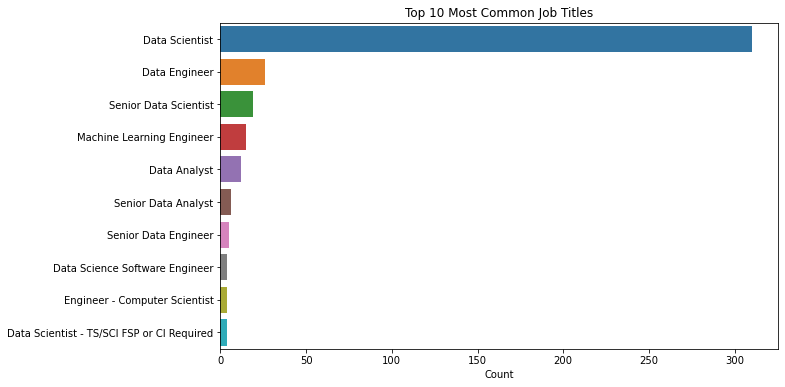

In [50]:
# Plot on bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=top10_job_titles, y='job_title', x='count')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

In [51]:
# Update long job name to a the shortened one: Engineer - Computer Scientist
indexes = df_clean[
    df_clean['job_title'] == 'ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING - SAN ANTONIO OR'
].index.tolist()

for index in indexes:
    df_clean.loc[index, 'job_title'] = 'Engineer - Computer Scientist'

In [52]:
# Confirm updates
df_clean.loc[indexes]

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,max_salary,avg_salary,python,sql,excel,hadoop,spark,aws,tableau,power bi
214,Engineer - Computer Scientist,79-106,Join our Defense and Intelligence Solutions Di...,3.9,Southwest Research Institute,"Oklahoma City, OK","San Antonio, TX",1001 to 5000 employees,1947,Nonprofit Organization,...,106,92,1,0,1,0,0,0,0,0
367,Engineer - Computer Scientist,112-116,Join our Defense and Intelligence Solutions Di...,3.9,Southwest Research Institute,"Oklahoma City, OK","San Antonio, TX",1001 to 5000 employees,1947,Nonprofit Organization,...,116,114,1,0,1,0,0,0,0,0
516,Engineer - Computer Scientist,212-331,Join our Defense and Intelligence Solutions Di...,3.9,Southwest Research Institute,"Oklahoma City, OK","San Antonio, TX",1001 to 5000 employees,1947,Nonprofit Organization,...,331,271,1,0,1,0,0,0,0,0
647,Engineer - Computer Scientist,92-155,Join our Defense and Intelligence Solutions Di...,3.9,Southwest Research Institute,"Oklahoma City, OK","San Antonio, TX",1001 to 5000 employees,1947,Nonprofit Organization,...,155,123,1,0,1,0,0,0,0,0


In [53]:
# Find the average minimum and maximum salary for each top 10 job
top10_jobs = df_clean['job_title'].value_counts()[:10].index.tolist()

# Calculate the average salary range for the top 10 jobs
df_clean[df_clean['job_title'].isin(top10_jobs)].groupby(['job_title'])[
    ['min_salary', 'max_salary']
].mean().round(2).sort_values(by=['min_salary'], ascending=False)

,min_salary,max_salary
job_title,,
Data Science Software Engineer,123.75,177.00
Engineer - Computer Scientist,123.75,177.00
Senior Data Scientist,104.37,157.84
Data Scientist,99.55,152.41
Senior Data Engineer,96.60,124.00
Senior Data Analyst,96.17,145.17
Data Analyst,94.33,143.00
Data Engineer,93.00,135.58
Machine Learning Engineer,82.53,128.00


In [96]:
# What is the average minimum and maximum salary in each sector?
df_clean.groupby('sector')[['min_salary', 'max_salary']].mean().round(3).reset_index().sort_values(by='min_salary', ascending=False)

,sector,min_salary,max_salary
6,Consumer Services,158.500,249.000
14,Media,126.400,184.200
18,Retail,119.857,180.429
9,Government,108.529,160.412
1,Aerospace & Defense,108.022,157.370
21,Travel & Tourism,106.333,151.000
4,Business Services,104.567,155.592
13,Manufacturing,100.957,145.522
22,Unknown,100.900,157.925
0,Accounting & Legal,99.667,149.667


In [123]:
# How many job openings are there in each sector?
sector_df = df_clean[df_clean['sector'] != 'Unknown']

round(sector_df['sector'].value_counts() / sector_df.shape[0] * 100.0, 2)

Information Technology                31.28
Business Services                     19.97
Biotech & Pharmaceuticals             10.98
Aerospace & Defense                    7.65
Finance                                5.49
Insurance                              5.32
Manufacturing                          3.83
Health Care                            3.49
Government                             2.83
Oil, Gas, Energy & Utilities           1.66
Telecommunications                     1.16
Retail                                 1.16
Transportation & Logistics             1.00
Media                                  0.83
Real Estate                            0.50
Travel & Tourism                       0.50
Agriculture & Forestry                 0.50
Education                              0.50
Accounting & Legal                     0.50
Construction, Repair & Maintenance     0.33
Consumer Services                      0.33
Non-Profit                             0.17
Name: sector, dtype: float64

In [98]:
# What is the average minimum and maximum salary in each industry?
df_clean.groupby('industry')[['min_salary', 'max_salary']].mean().round(3).reset_index().sort_values(by='min_salary', ascending=False)

,industry,min_salary,max_salary
39,Publishing,212.000,331.000
25,"Health, Beauty, & Fitness",158.500,249.000
23,Food & Beverage Stores,141.000,225.000
26,"Hotels, Motels, & Resorts",141.000,225.000
46,State & Regional Agencies,141.000,225.000
57,Wholesale,136.333,217.667
38,Other Retail Stores,129.000,205.667
15,Electrical & Electronic Manufacturing,122.667,168.333
3,Architectural & Engineering Services,118.667,191.000
56,Video Games,110.000,155.333


In [124]:
# How many job openings are there in each industry?
sector_df = df_clean[df_clean['industry'] != 'Unknown']

round(sector_df['industry'].value_counts() / sector_df.shape[0] * 100.0, 2)

Biotech & Pharmaceuticals                   10.98
IT Services                                 10.15
Computer Hardware & Software                 9.48
Aerospace & Defense                          7.65
Enterprise Software & Network Solutions      7.15
Consulting                                   6.32
Staffing & Outsourcing                       5.99
Insurance Carriers                           4.66
Internet                                     4.49
Advertising & Marketing                      3.83
Health Care Services & Hospitals             3.49
Research & Development                       2.83
Federal Agencies                             2.66
Investment Banking & Asset Management        2.16
Banks & Credit Unions                        1.33
Lending                                      1.33
Energy                                       0.83
Consumer Products Manufacturing              0.83
Telecommunications Services                  0.83
Insurance Agencies & Brokerages              0.67


In [56]:
# Locations with the most data science jobs
top10_loc = df_clean['location'].value_counts()[:10].reset_index()
top10_loc.columns = ['location', 'count']
top10_loc

,location,count
0,"San Francisco, CA",53
1,"New York, NY",49
2,"Washington, DC",26
3,"Boston, MA",24
4,"Chicago, IL",22
5,"Herndon, VA",21
6,"Cambridge, MA",16
7,"McLean, VA",12
8,United States,11
9,"Chantilly, VA",9


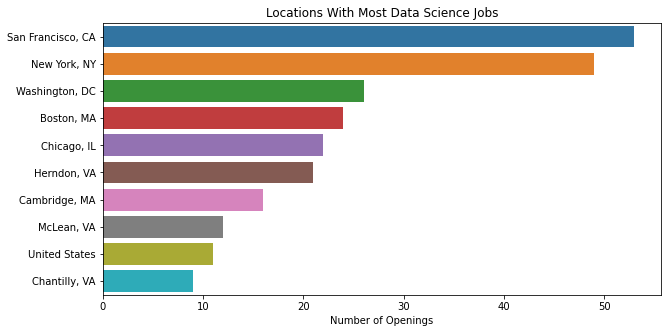

In [57]:
# Bar plot
plt.figure(figsize=(10,5))
sns.barplot(data = top10_loc, x='count', y='location')
plt.title('Locations With Most Data Science Jobs')
plt.xlabel('Number of Openings')
plt.ylabel('')
plt.show()

In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 671
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          641 non-null    object 
 1   salary_estimate    641 non-null    object 
 2   job_description    641 non-null    object 
 3   rating             641 non-null    float64
 4   company_name       641 non-null    object 
 5   location           641 non-null    object 
 6   headquarters       641 non-null    object 
 7   size               641 non-null    object 
 8   founded            641 non-null    int64  
 9   type_of_ownership  641 non-null    object 
 10  industry           641 non-null    object 
 11  sector             641 non-null    object 
 12  revenue            641 non-null    object 
 13  min_salary         641 non-null    int64  
 14  max_salary         641 non-null    int64  
 15  avg_salary         641 non-null    int64  
 16  python             641 non

In [97]:
# Highest average minimum salaries for all data science jobs by location
highest_avg_min = df_clean.groupby('location')[['min_salary', 'max_salary']].mean().sort_values(by='min_salary', ascending=False).reset_index()[:10]

print("Avg. Min. Salary For a Data Science Job By Location:")
highest_avg_min

Avg. Min. Salary For a Data Science Job By Location:


,location,min_salary,max_salary
0,"Wilmington, DE",212.0,331.00
1,"Fort Sam Houston, TX",212.0,331.00
2,"Pleasanton, CA",212.0,331.00
3,"Lexington Park, MD",158.5,249.00
4,"Dayton, OH",155.5,231.50
5,"Raleigh, NC",147.0,213.25
6,"Woodlawn, MD",145.0,225.00
7,"Seattle, WA",144.6,210.40
8,"Richmond, VA",143.0,225.00
9,"Menlo Park, CA",141.0,225.00


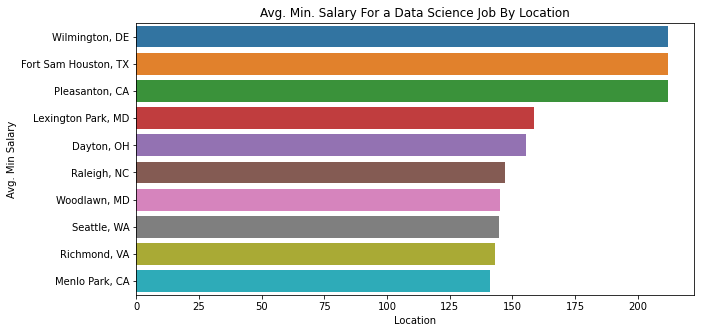

In [60]:
# Bar plot
plt.figure(figsize=(10,5))
sns.barplot(data=highest_avg_min, y='location', x='min_salary')
plt.title("Avg. Min. Salary For a Data Science Job By Location")
plt.xlabel("Location")
plt.ylabel("Avg. Min Salary")
plt.show()

In [62]:
# What technologies are most common in data science jobs?
tech = ['python', 'sql', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'power bi']

# List to contain number of jobs requiring specific tech
skill_count = []

# Iterate through each technology and determine the percentage of jobs requiring the tech
for t in tech:
    print("Skill:", t)
    
    # Insert sum of skill into list
    skill_count.append(df_clean[t].sum())
    
    # Calculate the percentage by dividing the sum of skill by the total rows in the dataset
    required_pct = round(df_clean[t].sum() / df_clean.shape[0] * 100.0, 0)
    
    print(f"Required by {required_pct}% of jobs")
    print("")

Skill: python
Required by 73.0% of jobs

Skill: sql
Required by 54.0% of jobs

Skill: excel
Required by 45.0% of jobs

Skill: hadoop
Required by 22.0% of jobs

Skill: spark
Required by 27.0% of jobs

Skill: aws
Required by 25.0% of jobs

Skill: tableau
Required by 18.0% of jobs

Skill: power bi
Required by 7.0% of jobs



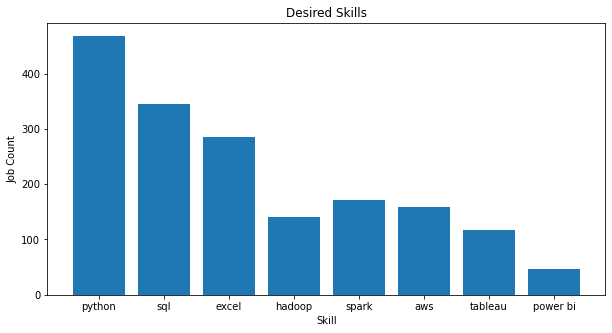

[468, 345, 286, 140, 172, 158, 117, 46]


In [63]:
# Bar plot of most desired skills
plt.figure(figsize=(10, 5))
plt.bar(tech, skill_count)
plt.title("Desired Skills")
plt.xlabel('Skill')
plt.ylabel('Job Count')
plt.show()

print(skill_count)

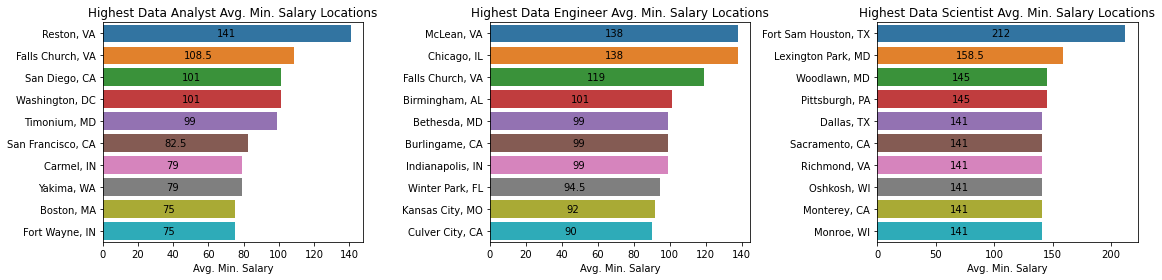

In [90]:
# What locations are the highest average salaries for Data Scientist, Data Engineer, and Data Analyst?
jobs = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# List to hold job dataframes
df_list = []

# Filter by job
for job in jobs:
    # Append to df_list
    df_list.append(
        df_clean[df_clean['job_title'] == job].groupby('location')['min_salary'].mean().sort_values(ascending=False).reset_index()[0:10]
    )

# Bar plot
fig, ax = plt.subplots(1, 3, figsize=(16,4))

# Used to determine plot position
subplot_col = 0

# Iterate through each data frame in df_list
for df in df_list:
    sns.barplot(data=df, y='location', x='min_salary', ax=ax[subplot_col])
    
    # Place labels in the center of the bar
    ax[subplot_col].bar_label(ax[subplot_col].containers[0], label_type='center', fontsize=10)
    
    # Use subplot_col to determine the job title from jobs list
    ax[subplot_col].set_title(f"Highest {jobs[subplot_col]} Avg. Min. Salary Locations")
    
    # Set y and x labels
    ax[subplot_col].set_ylabel("")
    ax[subplot_col].set_xlabel("Avg. Min. Salary")
    
    # Iterate subplot by 1
    subplot_col += 1
    
plt.tight_layout()
plt.show()

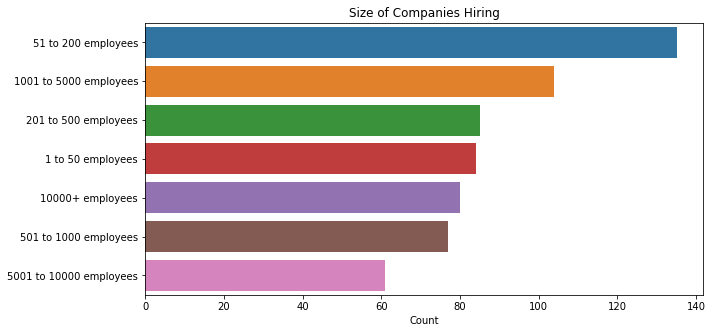

In [64]:
# What are the size of companies hiring?
company_size = df_clean[df_clean['size'] != 'Unknown']['size'].value_counts().reset_index()
company_size.columns = ['size', 'count']

# Plot bar 
plt.figure(figsize=(10,5))
sns.barplot(data=company_size, x='count', y='size')
plt.title("Size of Companies Hiring")
plt.xlabel("Count")
plt.ylabel("")
plt.show()